In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Regression

In [2]:
# Use sklearn for linear regression closed form solution

In [3]:
df = pd.read_csv('linear1.csv')
df.head()

,x,y
0,-2.000000,-1.304249
1,-1.995996,-0.998150
2,-1.991992,-1.439366
3,-1.987988,-1.460247
4,-1.983984,-1.388964


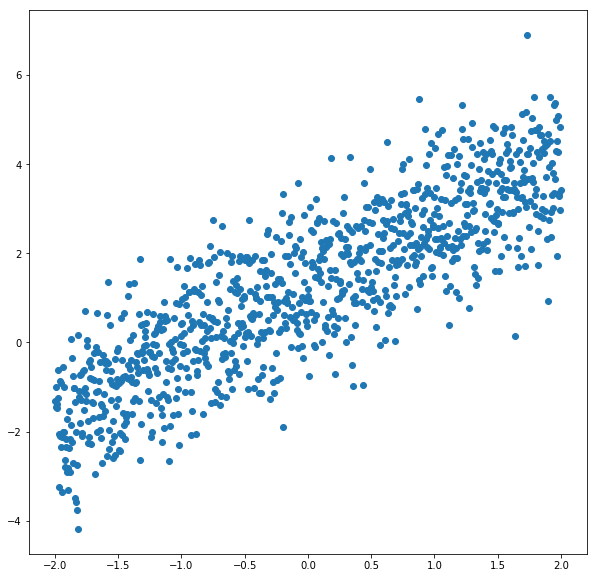

In [4]:
_, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df['x'], df['y'])

In [5]:
from sklearn.linear_model import LinearRegression

X = df['x'].values.reshape(-1, 1)
y = df['y']

linreg = LinearRegression()
linreg.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
linreg.coef_, linreg.intercept_

(array([1.41910551]), 1.2343148712560172)

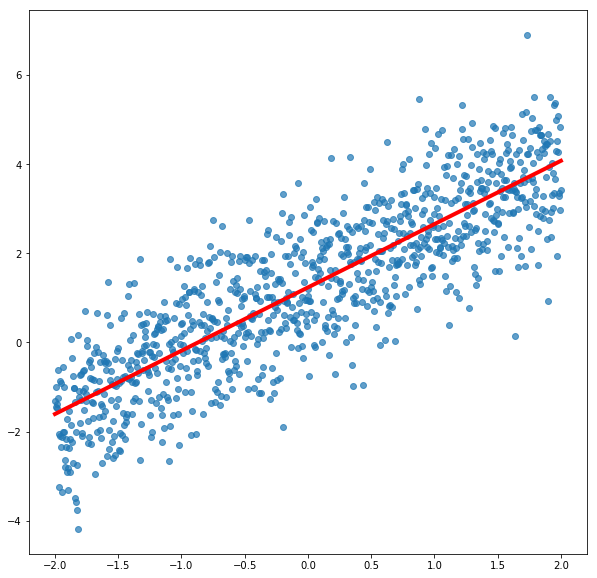

In [7]:
_, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df['x'], df['y'], alpha=0.7)

x = np.linspace(-2, 2, 1000).reshape(-1, 1)
y = linreg.predict(x)

ax.plot(x, y, color='red', linewidth=4)

In [8]:
# Use gradient descent for linear regression

(1.4191046743584992, 1.2342820861263688)


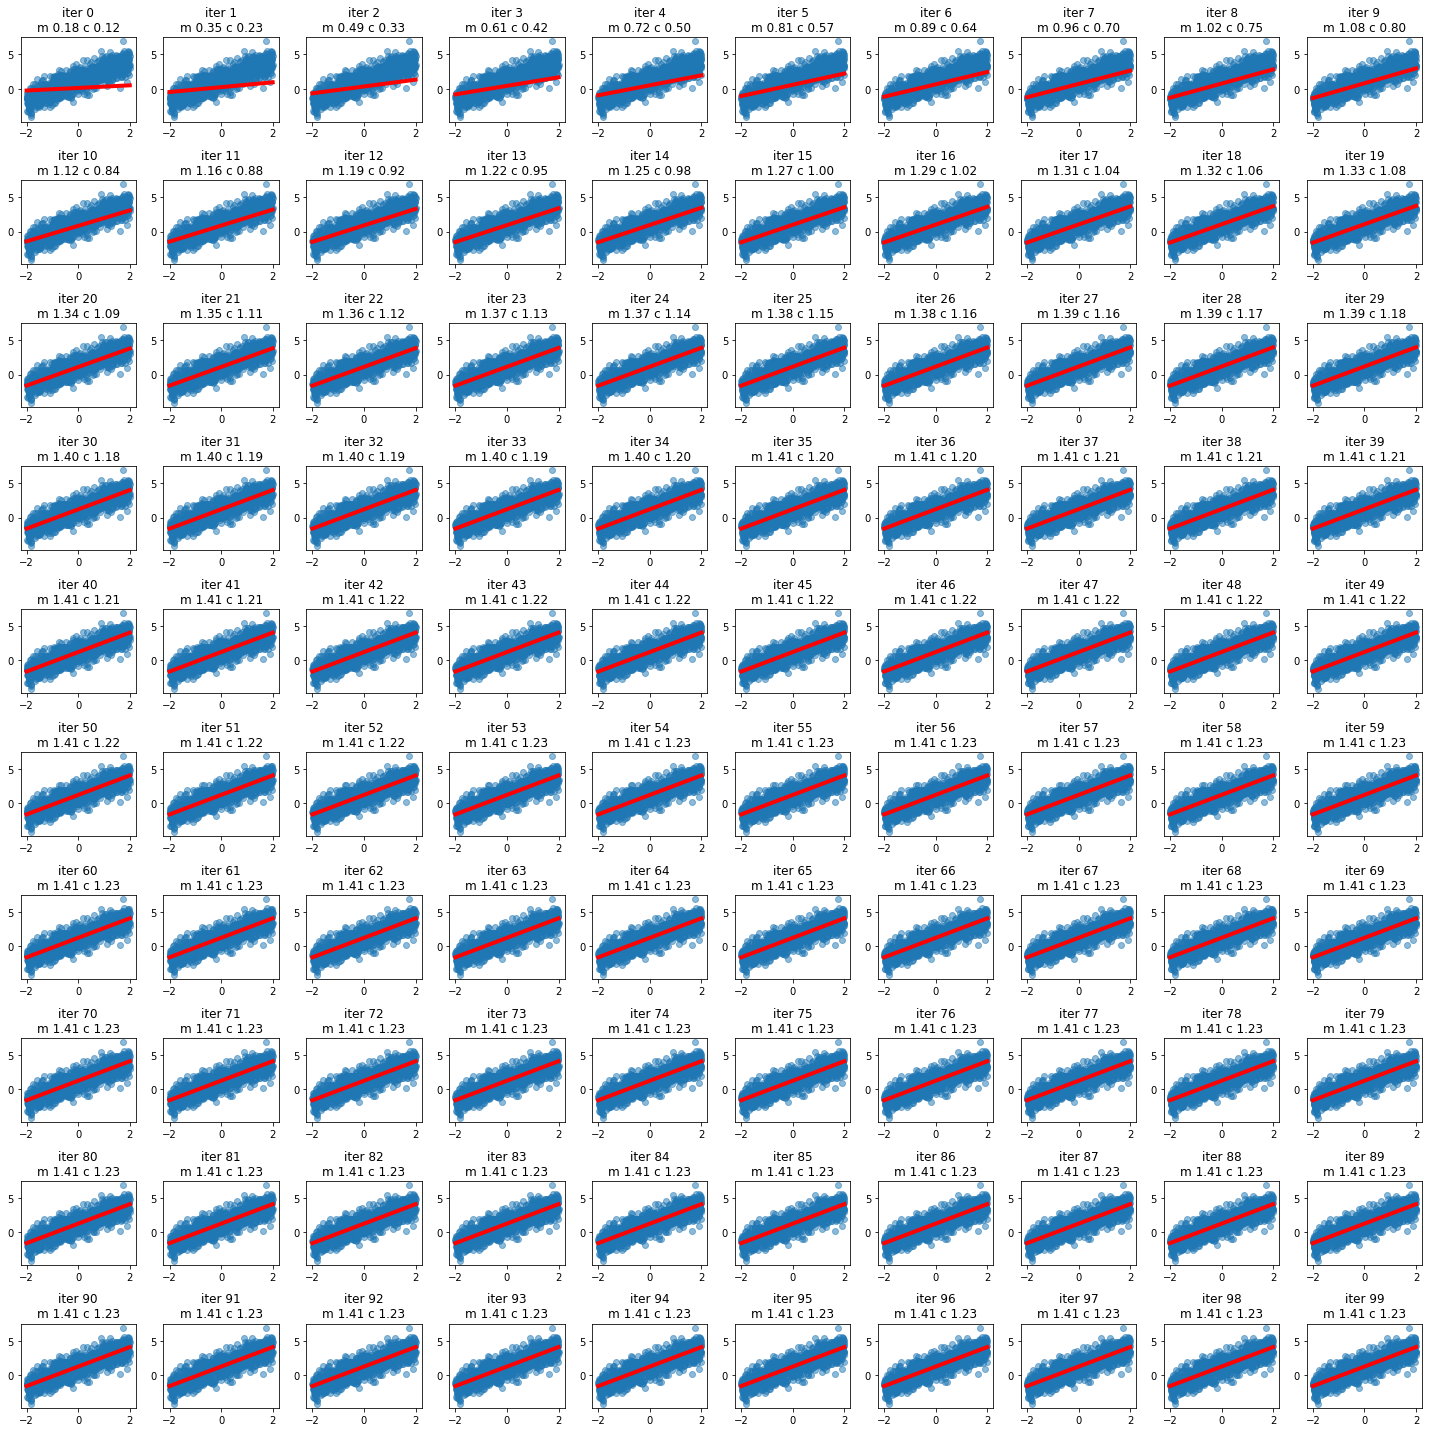

In [9]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
axes = axes.reshape(-1)

m = 0.
c = 0.

alpha = 0.1
epoch = 100

n = float(len(x))

X = df['x']
y = df['y']

for i in range(epoch): 
    y_pred = m*X + c
    
    delta_m = -np.sum(X * (y - y_pred)) / n
    delta_c = -np.sum(y - y_pred) / n
    
    m = m - (alpha * delta_m)
    c = c - (alpha * delta_c)
        
    ax = axes[i]
    ax.scatter(df['x'], df['y'], alpha=0.5)

    xs = np.linspace(-2, 2, 1000).reshape(-1, 1)
    ys = m*x + c
    ax.plot(xs, ys, color='red', linewidth=4)
    
    title = 'iter '+str(i) +'\nm '+str(m)[:4]+' c '+str(c)[:4]
    ax.set_title(title)
    
plt.tight_layout()
print (m, c)

# Classification

In [10]:
# Use sklearn logistic regression to classify easy dataset

In [11]:
easy = pd.read_csv('easy_dataset.csv')
easy.head()

,x,y,label
0,-2.866301,0.843183,0
1,-2.139075,1.413951,0
2,-1.537203,1.839824,0
3,-1.720740,1.373550,0
4,-0.518428,0.950258,0


In [12]:
def plot_dataset(df, ax=None):
    
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))
        
    ax.scatter(x='x', y='y', data=df[df['label'] == 0], color='red')
    ax.scatter(x='x', y='y', data=df[df['label'] == 1], color='green')
    
    return ax

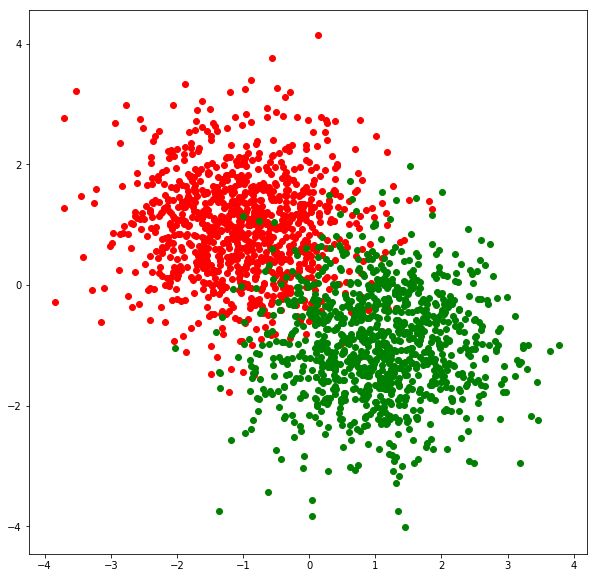

In [13]:
plot_dataset(easy)

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X = easy[['x', 'y']]
y = easy['label']

In [15]:
logreg.fit(X=X, y=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import accuracy_score

prediction = logreg.predict(X)
accuracy_score(prediction, y)

0.936

In [17]:
def plot_decision_boundary(df, model=None, func=None, ax=None):
    
    ax = plot_dataset(df, ax)
    
    if model is None:
        return
    
    max_x = np.max(df['x'])
    max_y = np.max(df['y'])
    
    min_x = np.min(df['x'])
    min_y = np.min(df['y'])
    
    n_sample = 200
    xs = np.linspace(min_x, max_x, n_sample)
    ys = np.linspace(min_y, max_y, n_sample)
    
    xx, yy = np.meshgrid(xs, ys)
    
    X = np.array([xx.reshape(-1), yy.reshape(-1)]).T
    X = pd.DataFrame(X)
    X.columns = ['x', 'y']
    y = df['label']
    
    if func is not None:
        X = func(X)
    
    zz = model.predict(X).reshape(n_sample, n_sample)
    ax.contour(xx, yy, zz, levels=(-1, 0, 1), linewidths=5, colors='black', alpha=0.95)
    ax.contourf(xx, yy, zz, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)
    
    ax.set_xlim((min_x, max_x))
    ax.set_ylim((min_y, max_y))
    
    return zz

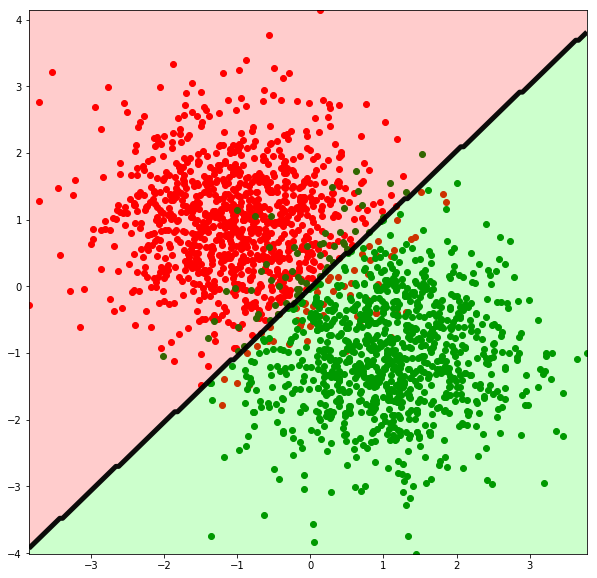

In [18]:
plot_decision_boundary(easy, logreg);

In [19]:
# Use sklearn logistic regression to classify medium dataset

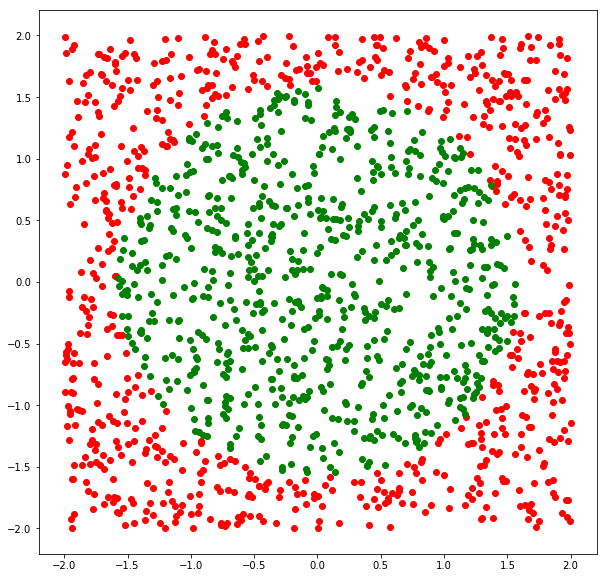

In [20]:
medium = pd.read_csv('medium_dataset.csv')
plot_dataset(medium)

In [21]:
X = medium[['x', 'y']]
y = medium['label']

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
prediction = logreg.predict(X)
accuracy_score(prediction, y)

0.5046666666666667

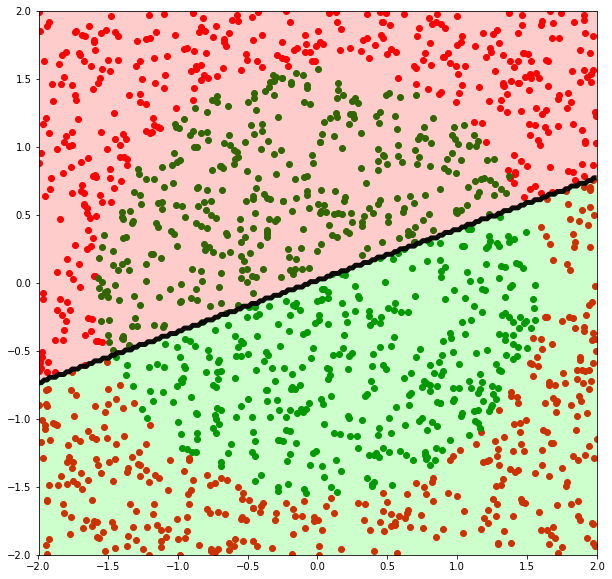

In [23]:
plot_decision_boundary(medium, logreg);

In [24]:
def transform(X):
    
    result = X.copy(deep=True)
    result['x2'] = X['x']**2
    result['y2'] = X['y']**2
    
    return result

In [25]:
X_transformed = transform(X)

logreg.fit(X_transformed, y)
prediction = logreg.predict(X_transformed)
accuracy_score(prediction, y)

0.996

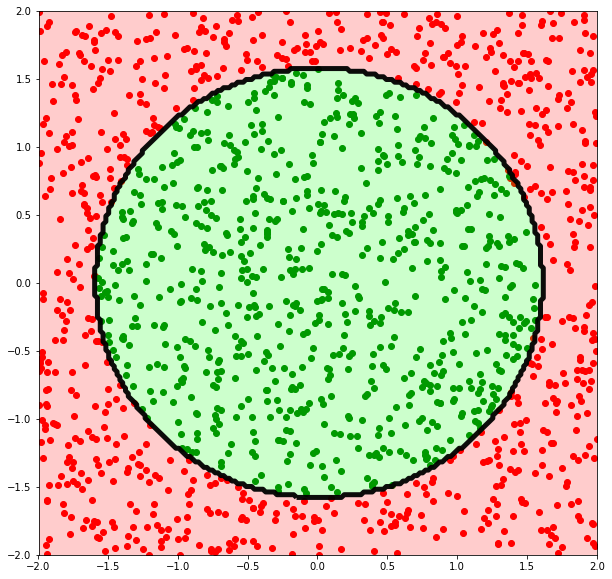

In [26]:
plot_decision_boundary(medium, logreg, transform);

In [27]:
# Use sklearn logistic regression to classify hard dataset

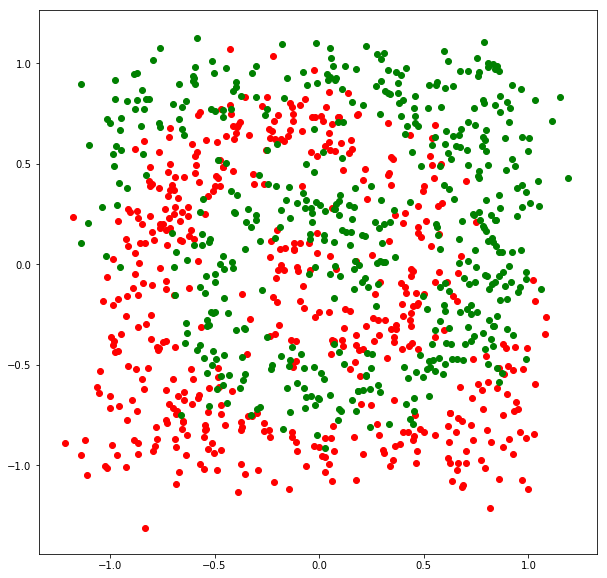

In [28]:
hard = pd.read_csv('hard_dataset.csv')
plot_dataset(hard)

In [29]:
X = hard[['x', 'y']]
y = hard['label']

logreg = LogisticRegression()
logreg.fit(X, y)

prediction = logreg.predict(X)
accuracy_score(prediction, y)

0.67

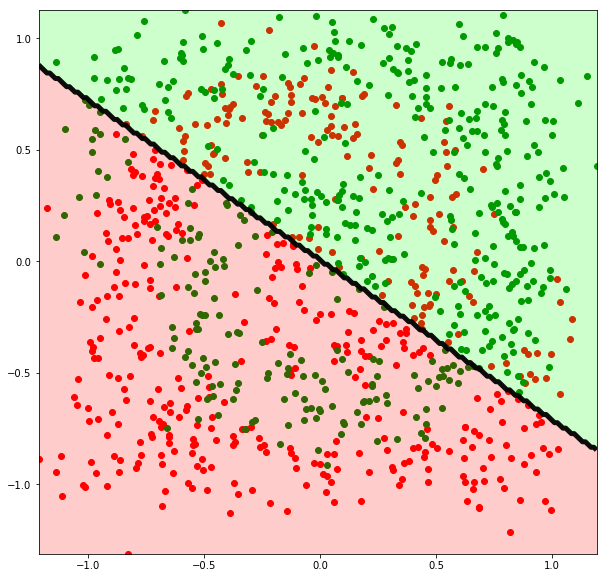

In [30]:
plot_decision_boundary(hard, logreg);

In [31]:
def transform(X):
    
    result = X.copy(deep=True)
    result['x2'] = X['x']**12
    result['y2'] = X['y']**45
    
    return result

X_transformed = transform(X)

logreg.fit(X_transformed, y)
prediction = logreg.predict(X_transformed)
accuracy_score(prediction, y)

0.67

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

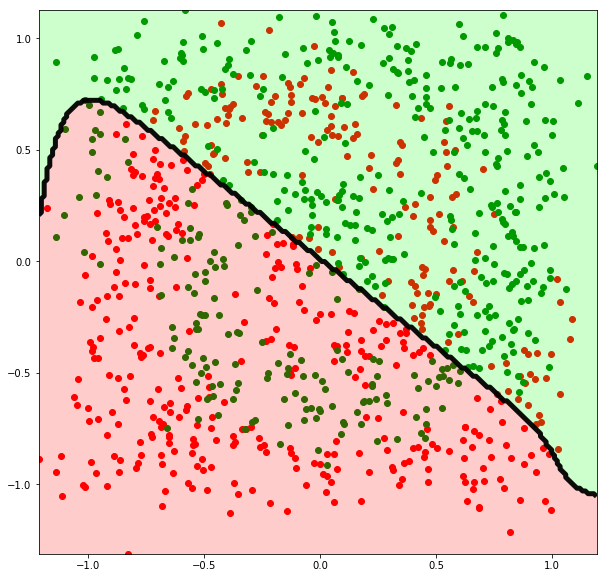

In [32]:
plot_decision_boundary(hard, logreg, transform)

In [33]:
#EXERCISE: manually find the transformation that can classified hard dataset!!!

In [34]:
# Use decision tree to classify hard dataset

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X, y)

prediction = dtc.predict(X)
accuracy_score(prediction, y)

1.0

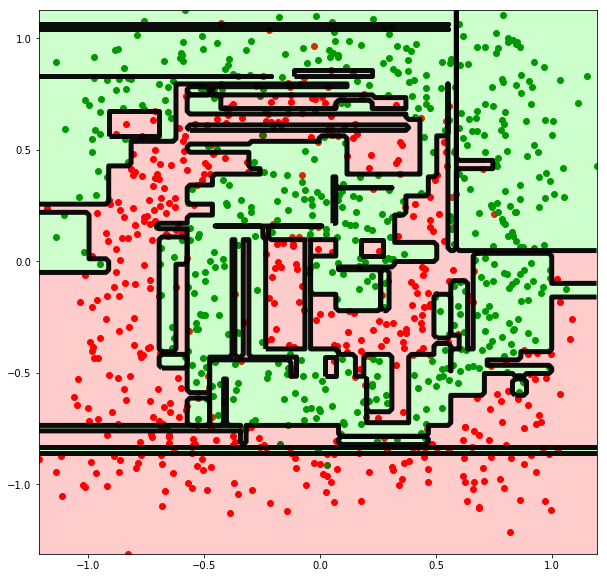

In [36]:
plot_decision_boundary(hard, dtc);

In [37]:
# Test different max_depth hyperparam

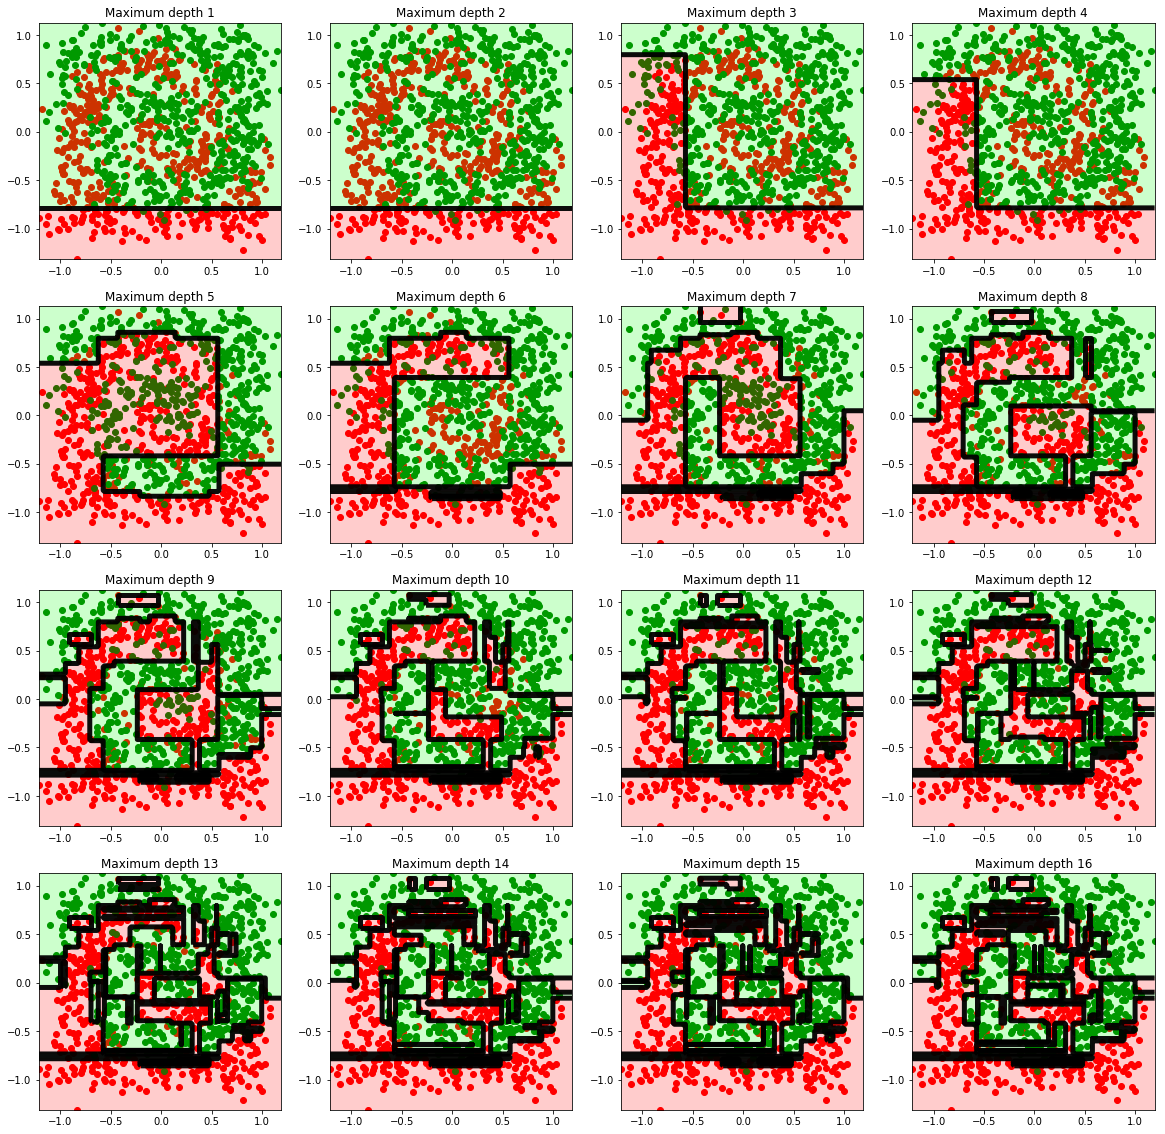

In [38]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i in range(16):
    dec = DecisionTreeClassifier(max_depth=i+1, criterion='entropy')
    dec.fit(X=hard[['x', 'y']], y=hard['label'])
    
    ax = axes.reshape(-1)[i]
    plot_decision_boundary(hard, dec, ax=ax)
    ax.set_title('Maximum depth '+str(i+1))

In [39]:
# EXERCISE

In [40]:
# Split train test to validly assess the performance

In [41]:
# cross validation to find best hyperparameter